In [1]:
import statistics
import networkx as nx
import matplotlib.pyplot as plt

def read_imsm(file_path):
    """
    Reads a graph from a file in IMSM format and returns a NetworkX graph object.
    
    Parameters:
    file_path (str): The path to the file containing the graph data.

    Returns:
    nx.Graph: The graph read from the file.
    """
    G = None
    try:
        with open(file_path, "r") as file:
            for line in file:
                line = line.strip().split()
                if line[0] == "t":
                    G = nx.Graph()  # Start a new graph
                elif line[0] == "v":
                    if G is not None:
                        G.add_node(int(line[1]), color=int(line[2]))  # Add a node with a color attribute
                elif line[0] == "e":
                    if G is not None:
                        G.add_edge(int(line[1]), int(line[2]))  # Add an edge between two nodes
    except IOError as e:
        print(f"Error reading file {file_path}: {e}")
    return G

graph = read_imsm("sample.graph")

In [2]:
def getProperties(G):
    """
    Calculates and returns various properties of the given graph G.

    Parameters:
    G (nx.Graph): The NetworkX graph for which properties are to be calculated.

    Returns:
    dict: A dictionary containing various graph properties.
    """
    properties = {}
    properties["vertex_count"] = G.number_of_nodes()
    properties["edge_count"] = G.number_of_edges()
    properties["average_neighbor_degree"] = statistics.mean(list(nx.average_neighbor_degree(G).values()))
    properties["average_degree_connectivity"] = statistics.mean(list(nx.average_degree_connectivity(G).values()))
    properties["diameter"] = nx.diameter(G)
    properties["radius"] = nx.radius(G)
    properties["average_shortest_path_length"] = nx.average_shortest_path_length(G)
    return properties

getProperties(graph)

{'vertex_count': 16,
 'edge_count': 25,
 'average_neighbor_degree': 3.6166666666666667,
 'average_degree_connectivity': 3.6033333333333335,
 'diameter': 6,
 'radius': 3,
 'average_shortest_path_length': 2.6166666666666667}

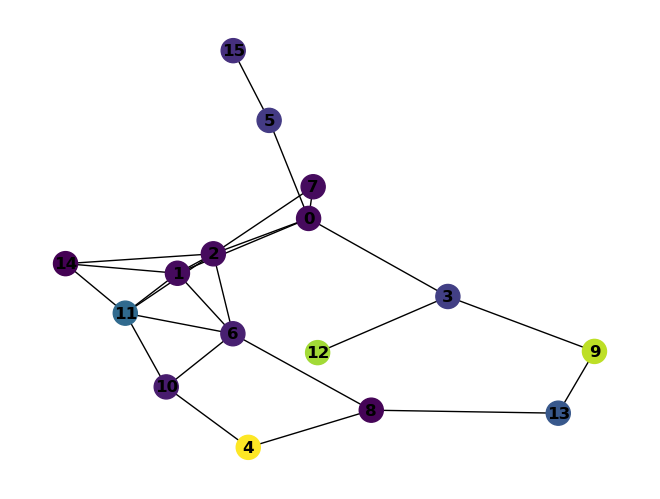

In [3]:
if graph is not None:
    pos = nx.spring_layout(graph)
    node_colors = [data['color'] for _, data in graph.nodes(data=True)]
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color=node_colors)
    plt.show()
else:
    print("Graph is empty or could not be loaded.")